# **Model Sistem Aplikasi Deteksi Citra X-ray Paru-paru Penyakit Tuberkulosis dengan Algoritma Convolutional Neural Network (CNN)**


Dandi Rifaldi Aldiansyah - 11518000072

Insitut Teknologi Indonesia

## **1. Pendahuluan**
Tuberkulosis merupakan suatu penyakit berbahaya dan mematikan yang menginfeksi paru-paru dan disebabkan oleh bakteri *mycobacterium tuberculosis* yang dapat menular melalui udara ketika seorang penderita tuberkulosis batuk, bersin, atau meludah. Secara global, penyakit tuberkulosis di seluruh dunia diperkirakan mencapai angka 10 juta kasus penderita pada tahun 2020 (*World Health Organization*, 2021). Sedangkan Di Indonesia sendiri terdapat 393.323 kasus tuberkulosis yang dilaporkan oleh Kementrian Kesehatan (Kemenkes) pada tahun 2020.



Penyakit tuberkulosis dapat disembuhkan, namun apabila terlambat dalam penangananya dapat meningkatkan resiko kematian. Dalam mendiagnosis penyakit ini umumnya dilakukan adalah melakukan *rontgen* dengan *x-ray* pada bagian dada pasien. Beberapa teknologi yang dapat digunakan untuk mendiagnosa penyakit 
tuberkulosis diantaranya adalah *computer vision* dan *deep learning*. algoritma CNN (*Convolutional Neural Network*) yang termasuk jenis *deep learning* sangat populer digunakan dalam klasifikasi data citra dan terbukti mengungguli metode lainnya. Algoritma CNN menggunakan sebuah jaringan dari sekelompok unit pemroses kecil yang dimodelkan berdasarkan jaringan saraf manusia sehingga dapat mengkasifikasikan data citra dengan cepat dan akurat. 

Maka dari itu, algoritma CNN dipilih sebagai metode dalam penelitian ini. Selanjutnya, pada penelitian ini penulis akan mengembangkan sebuah sistem pendeteksi citra *x-ray* dengan tuberkulosis menggunakan algoritma CNN. Sistem yang dikembangkan akan menghasilkan suatu model berformat .h5 yang dapat diimplementasikan pada halaman *website* prediksi tuberkulosis.

In [1]:
#import all libraries
!pip install kaggle
from google.colab import files
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import pickle
import time

from PIL import Image, ImageStat
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import models
from keras import layers
# from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing import image

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 

from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **2. Bussiness Understanding**

 
### **2.1 Problem Statements**
Dalam membuat sistem klasifikasi penyakit tuberkulosis berdasarkan citra hasil *x-ray* pada paru-paru manusia terdapat beberapa maslah yang harus diselesaikan, diantaranya:


*   Bagaimana membuat model untuk sistem klasifikasi tuberkulosis berdasarkan citra *x-ray*?
*   Berapa *hidden layer* yang paling akurat dari beberapa percobaan *fitting model* terhadap data latih?
*   Dengan data yang dimiliki, bagaimana sistem ini dapat membantu efisiensi tenaga kesehatan dalam pengkasifikasian tubekulosis?

### **2.2 Goals**
Sesuai dengan permasalan yang ada, tujuan dalam proyek ini diantaranya adalah. 
*   Membuat model dengan algoritma CNN dan  memhami cara kerjanya.
*   Mendapatkan model terbaik dari beberapa percobaan *fitting* dengan beberapa *hidden layer*.
*   Mengimplementaskan model terbaik pada aplikasi klasifikasi tuberkulosis berbasis website.

### **2.3 Solution Statements**


Agar dapat menjawab pertmasalahan diatas dan mencapai tujuan yang telah ditentukan, maka solusi yang akan dilakukan adalah 
*   Membuat model dan melakukan percobaan model dengan 3 hidden layer, 5 hidden layer, 7 hidden layer, dan seterusnya hingga menghasilkan model terbaik. 
*   Menyimpan model terbaik dalam format .h5 yang nantinya dapat diimplementaskan pada aplikasi klasifikasi tuberkulosis berbasis website. 

##**3. Data Loading**


###**3.1 Download Data**
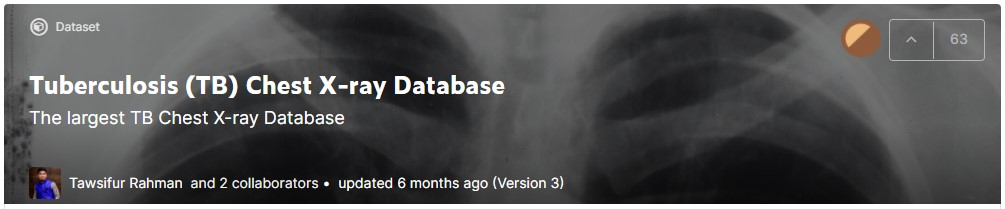


Model untuk sistem aplikasi deteksi citra *x-ray* paru-paru untuk tuberkulosis diambil dari halaman web [Kaggle.com](https://kaggle.com) yang merupakan website penyedia *dataset* yang cukup terkenal dengan Kaggle API.

*Dataset* ini telah dibuat oleh [Tawsifur Rahman](https://www.kaggle.com/tawsifurrahman), [Dr. Muhammad Chowdhury](https://www.kaggle.com/mc16262), dan [Amith Khandakar](https://www.kaggle.com/amithkhandakar) pada tahun 2020 yang dapat diunduh dan diolah secara gratis. Untuk detailnya ada di laman web berikut [ini](https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset).

Selanjutnya, menuju ke halaman Kaggle.com dan menngunduh file kaggle.json yang terdapat pada halaman *account* Anda.
 
> Cara: Klik foto profil akun anda di pojok kanan atas **Profile** > **Account** > **Tab** **Account** > Menu **API** lalu klik **Create New API Token** lalu simpan file kaggle.json di komputer *local*.



Setelah itu, *upload* file kaggle.json yang telah disimpan dengan menjalankan kode dibawah ini lalu klik *choose* *file*



In [2]:
uploaded= files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Pindah file Kaggle.json ke folder dimana API dapat menemukannya.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


Sekarang dataset dapat diunduh dari halaman web Kaggle hanya dengan menuliskan dan menjaankan kode seperti di bawah ini

In [3]:
!kaggle datasets download "tawsifurrahman/tuberculosis-tb-chest-xray-dataset"

100% 662M/663M [00:36<00:00, 17.1MB/s]
100% 663M/663M [00:36<00:00, 18.9MB/s]


###**3.2 Unzip Dataset**
Dataset yang telah diunduh akan berupa file dengan format .zip yang dapat kita lihat pada tab flie (gambar folder pada left-sidebar google colab) yang perlu diekstrak agar dataset dapat digunakan.

Ekstrak dataset yang telah diunduh dengan menjalankan kode dibawah.

In [4]:
!unzip tuberculosis-tb-chest-xray-dataset.zip

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

Setelah diekstrak terdapat sebuah folder TB-Chest Radiography_Database yang di dalamnya terdapat folder Normal dan Tuberkulosis serta dua file .xls dan satu file Readme.md.txt

Pada kali ini model hanya menggunakan folder Normal dan Tuberkulosis yang di dalamnya terdapat citra x-ray paru-paru dengan kategori sesuai dengan nama folder tersebut

Selanjutnya, inisialisasi variable base_dir (path direktori utama), tuberculosis_data, dan normal_data.

In [5]:
base_dir = "TB_Chest_Radiography_Database"

In [6]:
tuberculosis_data= base_dir+"/Tuberculosis/"
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= base_dir+"/Normal/"
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

tuberculosis images :
 ['Tuberculosis-554.png', 'Tuberculosis-412.png', 'Tuberculosis-649.png', 'Tuberculosis-103.png', 'Tuberculosis-680.png']

normal images :
 ['Normal-291.png', 'Normal-18.png', 'Normal-2501.png', 'Normal-1086.png', 'Normal-1528.png']


##**4. Data Understanding**

Pada *Data understanding* akan melihat berapa jumlah dataset yang akan digunakan, jenis gambar dataset (apakah *greyscale* atau RGB), format gambar dataset, dan lain-lain

### **4.1 Amount of Data**

In [7]:
print("Total of All Images :" ,len(os.listdir(tuberculosis_data))+len(os.listdir(normal_data)))
print("Total of Tuberculosis Images :" ,len(os.listdir(tuberculosis_data)))
print("\nTotal of Normal Images :" ,len(os.listdir(normal_data)))

Total of All Images : 4200
Total of Tuberculosis Images : 700

Total of Normal Images : 3500


0    3500
1     700
Name: label, dtype: int64


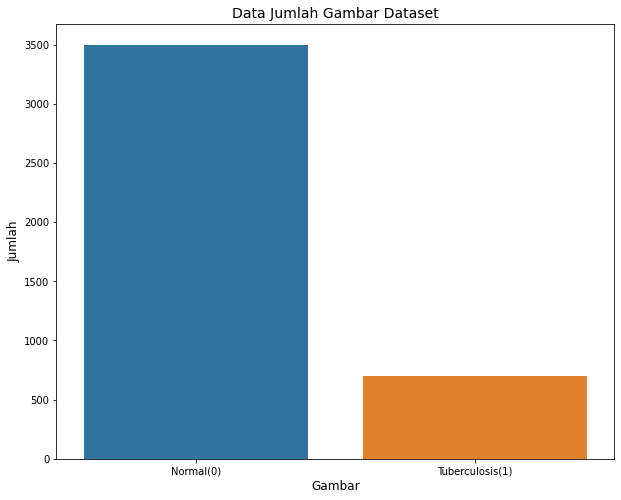

In [8]:
# Get the counts for each class
all_data=[]

# Go through all the normal cases. The label for these cases will be 0
for img in os.listdir(normal_data):
    all_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in os.listdir(tuberculosis_data):
    all_data.append((img, 1))

all_data = pd.DataFrame(all_data, columns=['image', 'label'],index=None)
# Shuffle the data 
all_data = all_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
all_data.head()

cases_count = all_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Data Jumlah Gambar Dataset', fontsize=14)
plt.xlabel('Gambar', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.savefig("graph_jumlah_data.jpg")
plt.show()

Tenyata pada *dataset* terdapat 4200 data citra x-ray dengan 700 data berkategori tuberkulosis dan 3500 data kategori normal

###**4.2 Data Types**

In [9]:
def detect_color_image_v1(file, thumb_size=40, MSE_cutoff=22, adjust_color_bias=True):
    pil_img = Image.open(file)
    bands = pil_img.getbands()
    if bands == ('R','G','B') or bands== ('R','G','B','A'):
        thumb = pil_img.resize((thumb_size,thumb_size))
        SSE, bias = 0, [0,0,0]
        if adjust_color_bias:
            bias = ImageStat.Stat(thumb).mean[:3]
            bias = [b - sum(bias)/3 for b in bias ]
        for pixel in thumb.getdata():
            mu = sum(pixel)/3
            SSE += sum((pixel[i] - mu - bias[i])*(pixel[i] - mu - bias[i]) for i in [0,1,2])
        MSE = float(SSE)/(thumb_size*thumb_size)
        if MSE <= MSE_cutoff:
            return("grayscale")
        else:
            return("Color")
    elif len(bands)==1:
        return("Black and white")
    else:
        return("Don't know...")

MONOCHROMATIC_MAX_VARIANCE = 0.005
COLOR = 1000
MAYBE_COLOR = 100
        
color=0
b_and_w=0
for im in os.listdir(tuberculosis_data):
    path = tuberculosis_data +"/"+ im
    #print(detect_color_image(path)==detect_color_image_v1(path), path, detect_color_image(path), detect_color_image_v1(path),)
    if detect_color_image_v1(path)=="Color":
        color+=1
    else:
        b_and_w+=1
print("Tuberculosis (total img {}) -> RGB: {} Grayscale: {}".format(color + b_and_w, color, b_and_w))

color=0
b_and_w=0
for im in os.listdir(normal_data):
    path = normal_data +"/"+ im
    #print(detect_color_image(path)==detect_color_image_v1(path), path, detect_color_image(path), detect_color_image_v1(path),)
    if detect_color_image_v1(path)=="Color":
        color+=1
    else:
        b_and_w+=1
print("\nNormal (total img {}) -> RGB: {}  Grayscale: {}".format(color + b_and_w, color, b_and_w))

Tuberculosis (total img 700) -> RGB: 359 Grayscale: 341

Normal (total img 3500) -> RGB: 0  Grayscale: 3500


Terdapat 359 data bertipe RGB dan 341 bertipe Greyscale dari total 700 data pada kategori Tuberkulosis.
Terdapat 0 data bertipe RGB dan 3500 bertipe Greyscale dari total 3500 data pada kategori Normal.



###**4.3 Data Visualization**

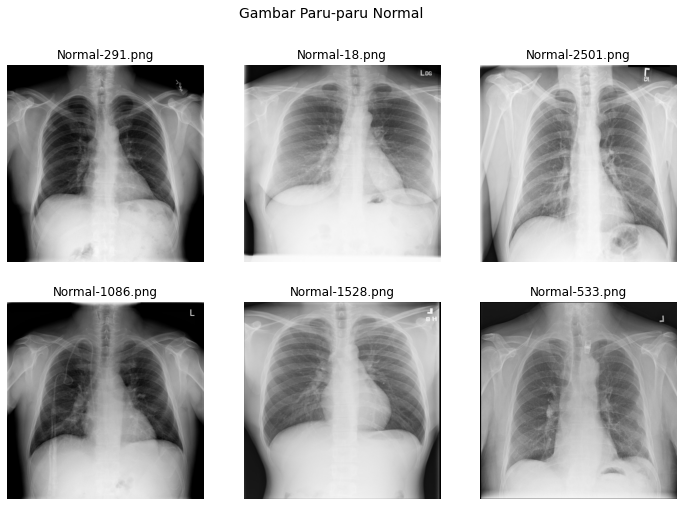

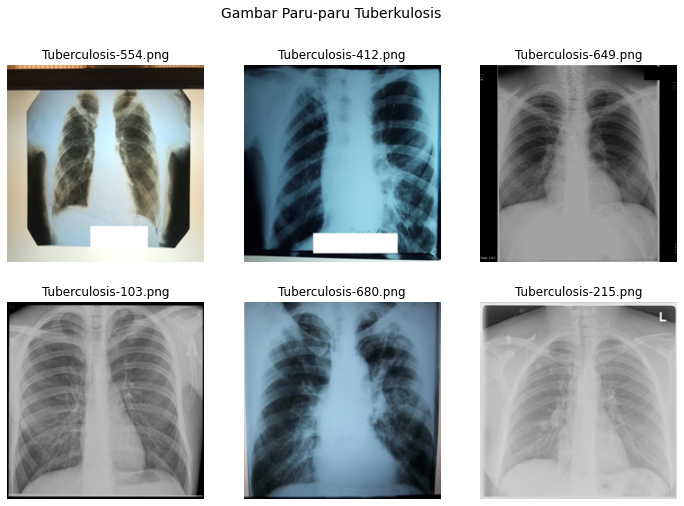

In [10]:
nrows= 2
ncols= 3
pic_index= 6

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

tuberculosis_img = [os.path.join(tuberculosis_data, image) for image in os.listdir(tuberculosis_data)[0:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[0:pic_index]]

for i, image_path in enumerate(normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = cv2.imread(image_path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.title(image_path[37:])
    plt.suptitle("Gambar Paru-paru Normal", fontsize=14)
        
plt.savefig("data_gambar_normal.jpg")
plt.show()
print("\n")
fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
for i, image_path in enumerate(tuberculosis_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = cv2.imread(image_path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.title(image_path[43:])
    plt.suptitle("Gambar Paru-paru Tuberkulosis", fontsize=14)

plt.savefig("data_gambar_tb.jpg")
plt.show()


## **5. Data Pre-Processing**

###**5.1 Resize Images Data**

In [11]:
TBC_Dataset = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  image_size=(224, 224)
  )
class_names = TBC_Dataset.class_names
print(class_names)

Found 4200 files belonging to 2 classes.
['Normal', 'Tuberculosis']


###**5.2 Grayscalling**

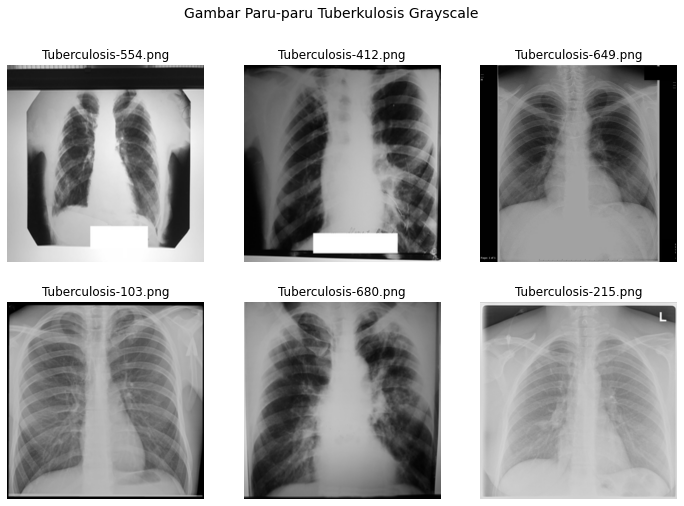

In [12]:
# newpath = 'tb_grayscale' 
newpath_nm= 'grayscale/nm' 
newpath_tb = 'grayscale/tb' 
if not os.path.exists(newpath_nm):
    os.makedirs(newpath_nm)
if not os.path.exists(newpath_tb):
    os.makedirs(newpath_tb)

for filename in os.listdir(tuberculosis_data): 
  x = cv2.imread(tuberculosis_data+filename)
  # x = cv2.resize(x,(224,224))
  # x = x.reshape(224, 224, x.shape[2])
  x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) 
  cv2.imwrite(newpath_tb+'/'+filename, x)
  # imgplot = cv2_imshow(x)
  # x = np.array(x)/255
  # x = x.reshape(-1, 224, 224, 1)                                                                                                                                                               

for filename in os.listdir(normal_data): 
  x = cv2.imread(normal_data+filename)
  # x = cv2.resize(x,(224,224))
  # x = x.reshape(224, 224, x.shape[2])
  x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) 
  cv2.imwrite(newpath_nm+'/'+filename, x)

tuberculosis_gray_img = [os.path.join(newpath_tb, image) for image in os.listdir(newpath_tb)[0:pic_index]]
fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
for i, image_path in enumerate(tuberculosis_gray_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = cv2.imread(image_path)
    # rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.title(image_path[13:])
    plt.suptitle("Gambar Paru-paru Tuberkulosis Grayscale", fontsize=14)

plt.savefig("data_gambar_tb_gray.jpg")
plt.show()
   

###**5.3 Data Augmentation**

In [13]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest',
                                   validation_split=0.2
                                   )
    
validation_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 20,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode = 'nearest',
                                        validation_split=0.2
                                        )

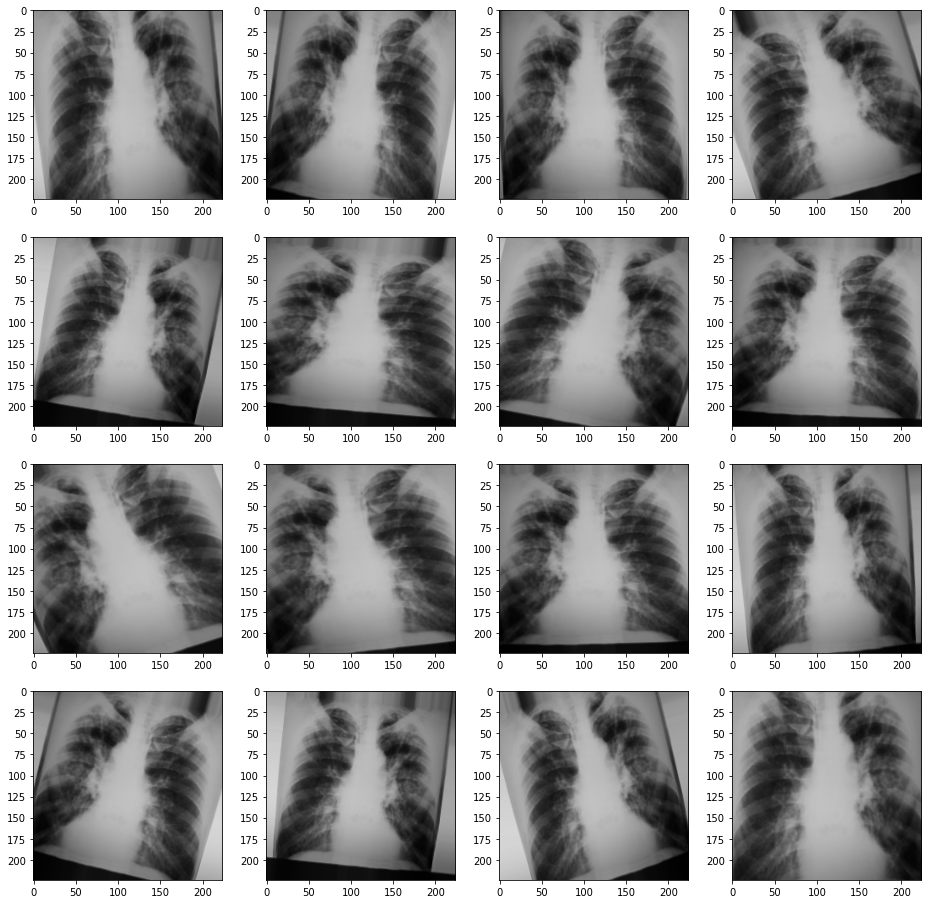

In [69]:
base_dir_gray="grayscale"
image_path = newpath_tb+"/Tuberculosis-680.png"
img = tf.keras.utils.load_img(image_path, target_size= (224,224))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(
                            # rescale=1./225,
                            rotation_range = 20,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.savefig("data_augmentation.png")
plt.show()

###**5.4 Initialization Train and Validation Data**

In [14]:

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    class_mode='binary',
    color_mode="grayscale",
    batch_size= 32,
    seed=123,
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    class_mode='binary',
    color_mode="grayscale",
    shuffle=False,
    seed = 123,
    batch_size= 32,
    subset='validation'
)

Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


## **6. Modelling**

###**6.1 Model 1 (3 Hidden Layer)**

In [15]:
model1 = Sequential()
model1.add(Conv2D(32,1,padding="same", activation="relu", input_shape=(224,224,1)))
model1.add(MaxPool2D())

model1.add(Conv2D(32, 1, padding="same", activation="relu"))
model1.add(MaxPool2D())

model1.add(Conv2D(64, 1, padding="same", activation="relu"))
model1.add(MaxPool2D())
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(128,activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      64        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      1056      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        2112      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

Text(0.5, 1.0, 'Model 1')

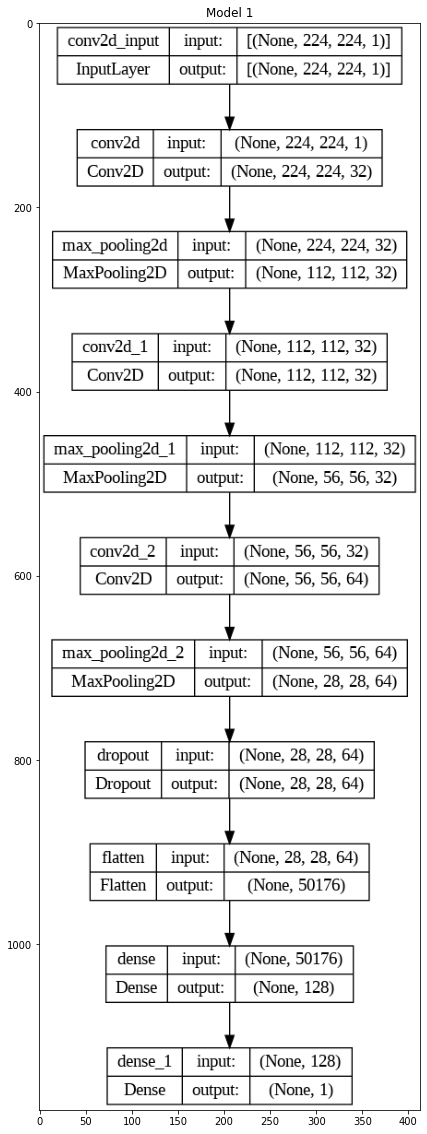

In [16]:
plot_model(model1, to_file='model1.png',show_shapes = True)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
img = cv2.imread('model1.png')
plt.imshow(img)
plt.title("Model 1")

In [17]:
opt = Adam(learning_rate=1e-3)
model1.compile(
    optimizer = opt, 
    # loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

###**6.2 Model 2 (6 Hidden Layer)**

In [18]:
model2 = tf.keras.models.Sequential([
        layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,1)),
        layers.MaxPool2D(2,2),

        layers.Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'),
        layers.MaxPool2D(2,2),
        
        layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPool2D(2,2),
    
        layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPool2D(2,2),              
        
        layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPool2D(2,2),             

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid') 
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

Text(0.5, 1.0, 'Model 2')

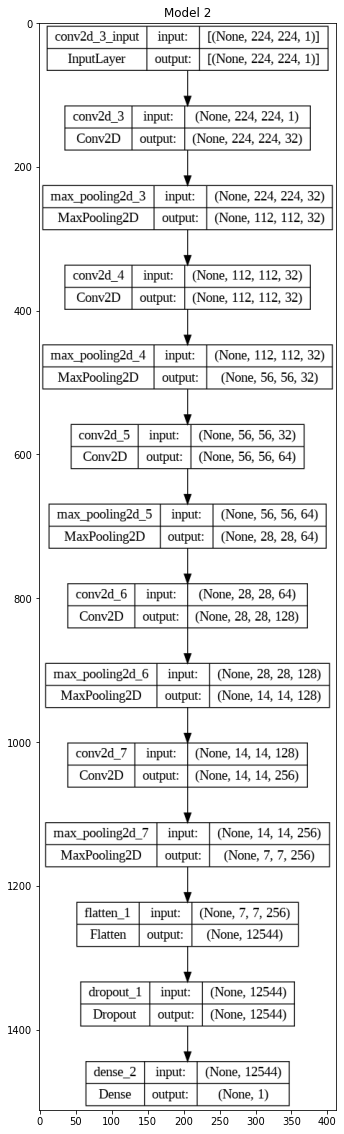

In [19]:
plot_model(model2, to_file='model2.png',show_shapes = True)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
img = cv2.imread('model2.png')
plt.imshow(img)
plt.title("Model 2")

In [20]:
model2.compile(
    optimizer = opt, 
    # loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

###**6.3 Model 3 (9 Hidden Layers)**

In [21]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model3.add(MaxPool2D((2, 2)))

model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 111, 111, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 55, 55, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 64)      

Text(0.5, 1.0, 'Model 3')

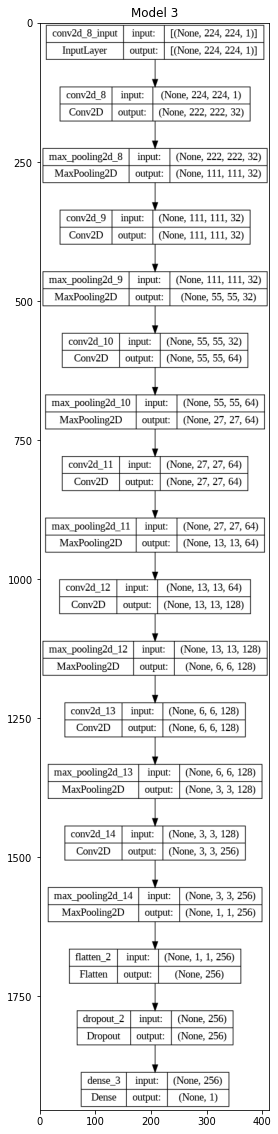

In [22]:
plot_model(model3, to_file='model3.png',show_shapes = True)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
img = cv2.imread('model3.png')
plt.imshow(img)
plt.title("Model 3")

In [23]:
model3.compile(
    optimizer = opt, 
    # loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

##**7. Training Model**

In [24]:
fitting = True
epoch_range = 50

In [25]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

###**7.1 Model 1**

In [26]:
if fitting:
    t1 = time.time()
    history1 = model1.fit(train_generator, 
                    epochs=epoch_range,
                    validation_data=validation_generator,
                    verbose=2,
                    callbacks=[early_stopping],
                    shuffle = True)
    t2 = time.time()

Epoch 1/50
105/105 - 56s - loss: 0.3583 - accuracy: 0.8461 - val_loss: 0.2808 - val_accuracy: 0.9000 - 56s/epoch - 537ms/step
Epoch 2/50
105/105 - 49s - loss: 0.2462 - accuracy: 0.9048 - val_loss: 0.2277 - val_accuracy: 0.9024 - 49s/epoch - 467ms/step
Epoch 3/50
105/105 - 48s - loss: 0.2181 - accuracy: 0.9199 - val_loss: 0.2291 - val_accuracy: 0.8905 - 48s/epoch - 458ms/step
Epoch 4/50
105/105 - 48s - loss: 0.1824 - accuracy: 0.9310 - val_loss: 0.2422 - val_accuracy: 0.9000 - 48s/epoch - 458ms/step
Epoch 5/50
105/105 - 48s - loss: 0.1717 - accuracy: 0.9369 - val_loss: 0.1830 - val_accuracy: 0.9286 - 48s/epoch - 460ms/step
Epoch 6/50
105/105 - 49s - loss: 0.1711 - accuracy: 0.9372 - val_loss: 0.2067 - val_accuracy: 0.9143 - 49s/epoch - 467ms/step
Epoch 7/50
105/105 - 48s - loss: 0.1627 - accuracy: 0.9411 - val_loss: 0.1563 - val_accuracy: 0.9429 - 48s/epoch - 460ms/step
Epoch 8/50
105/105 - 48s - loss: 0.1492 - accuracy: 0.9488 - val_loss: 0.1426 - val_accuracy: 0.9536 - 48s/epoch - 457

###**7.2 Model 2**

In [27]:
if fitting:
    t1_2 = time.time()
    history2 = model2.fit(train_generator, 
                    epochs=epoch_range,
                    validation_data=validation_generator,
                    verbose=2,
                    callbacks=[early_stopping],
                    shuffle = True)
    t2_2 = time.time()

Epoch 1/50
105/105 - 49s - loss: 0.4690 - accuracy: 0.8324 - val_loss: 0.3653 - val_accuracy: 0.8321 - 49s/epoch - 465ms/step
Epoch 2/50
105/105 - 48s - loss: 0.3328 - accuracy: 0.8685 - val_loss: 0.3070 - val_accuracy: 0.8560 - 48s/epoch - 454ms/step
Epoch 3/50
105/105 - 48s - loss: 0.2657 - accuracy: 0.8979 - val_loss: 0.2625 - val_accuracy: 0.8810 - 48s/epoch - 460ms/step
Epoch 4/50
105/105 - 47s - loss: 0.2325 - accuracy: 0.9143 - val_loss: 0.2565 - val_accuracy: 0.8726 - 47s/epoch - 452ms/step
Epoch 5/50
105/105 - 48s - loss: 0.1778 - accuracy: 0.9330 - val_loss: 0.1938 - val_accuracy: 0.9155 - 48s/epoch - 455ms/step
Epoch 6/50
105/105 - 48s - loss: 0.1569 - accuracy: 0.9348 - val_loss: 0.1659 - val_accuracy: 0.9262 - 48s/epoch - 454ms/step
Epoch 7/50
105/105 - 48s - loss: 0.1378 - accuracy: 0.9518 - val_loss: 0.1323 - val_accuracy: 0.9476 - 48s/epoch - 461ms/step
Epoch 8/50
105/105 - 47s - loss: 0.1385 - accuracy: 0.9536 - val_loss: 0.1723 - val_accuracy: 0.9179 - 47s/epoch - 451

###**7.3 Model 3**

In [28]:
if fitting:
    t1_3 = time.time()
    history3 = model3.fit(train_generator, 
                    epochs=epoch_range,
                    validation_data=validation_generator,
                    verbose=2,
                    callbacks=[early_stopping],
                    shuffle = True)
    t2_3 = time.time()

Epoch 1/50
105/105 - 49s - loss: 0.5423 - accuracy: 0.8280 - val_loss: 0.4507 - val_accuracy: 0.8333 - 49s/epoch - 468ms/step
Epoch 2/50
105/105 - 48s - loss: 0.4555 - accuracy: 0.8333 - val_loss: 0.4525 - val_accuracy: 0.8333 - 48s/epoch - 453ms/step
Epoch 3/50
105/105 - 47s - loss: 0.4504 - accuracy: 0.8333 - val_loss: 0.4555 - val_accuracy: 0.8333 - 47s/epoch - 451ms/step
Epoch 4/50
105/105 - 48s - loss: 0.4540 - accuracy: 0.8333 - val_loss: 0.4506 - val_accuracy: 0.8333 - 48s/epoch - 458ms/step
Epoch 5/50
105/105 - 48s - loss: 0.4543 - accuracy: 0.8333 - val_loss: 0.4506 - val_accuracy: 0.8333 - 48s/epoch - 454ms/step
Epoch 6/50
105/105 - 47s - loss: 0.4469 - accuracy: 0.8333 - val_loss: 0.4388 - val_accuracy: 0.8333 - 47s/epoch - 450ms/step
Epoch 7/50
105/105 - 47s - loss: 0.3726 - accuracy: 0.8333 - val_loss: 0.3676 - val_accuracy: 0.8333 - 47s/epoch - 450ms/step
Epoch 8/50
105/105 - 47s - loss: 0.3365 - accuracy: 0.8333 - val_loss: 0.3244 - val_accuracy: 0.8333 - 47s/epoch - 452

##**8. Evaluation**

###**8.1 Model 1**

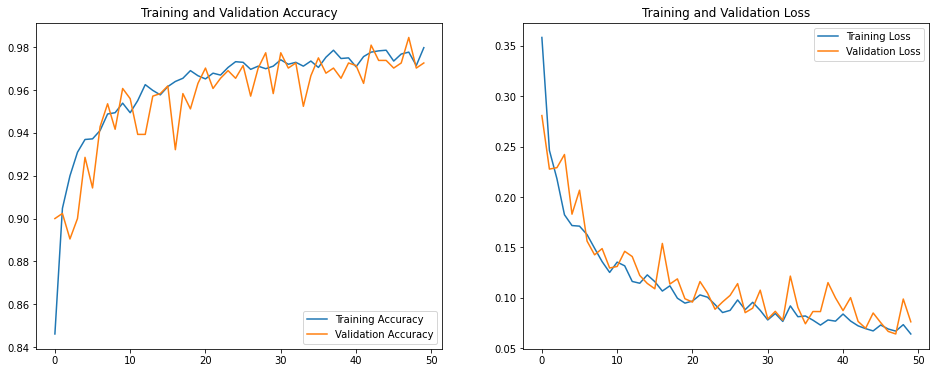

In [29]:
# membuat grafik visualisasi akurasi dan loss

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs_range1 = range(50)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range1, acc1, label='Training Accuracy')
plt.plot(epochs_range1, val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range1, loss1, label='Training Loss')
plt.plot(epochs_range1, val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("gambar_acc&loss_model1.jpg")
plt.show()


In [30]:
print("Time to Fit: " + str((t2-t1)/60) + " Minutes")

Time to Fit: 42.43775881528855 Minutes


In [31]:
prediction1= model1.predict(validation_generator, 
                          #  steps=np.ceil(validation_generator.samples/validation_generator.batch_size),
                           verbose=2)
prediction1= (prediction1 > 0.5)
# result = np.where(prediction > 0.5, 1, 0)
prediction1

27/27 - 9s - 9s/epoch - 345ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [32]:
val_labels=validation_generator.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff8ec1da640>)

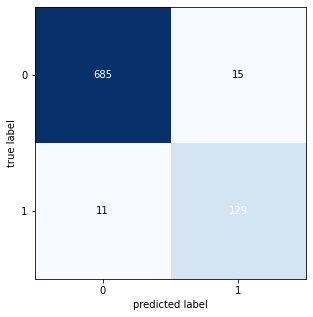

In [33]:
cm1= confusion_matrix(validation_generator.classes, prediction1)
plot_confusion_matrix(cm1, figsize=(5,5))
# plot_confusion_matrix.savefig("gambar_confmatt_model1.jpg")

In [34]:
print(accuracy_score(validation_generator.classes, prediction1))
print(classification_report(validation_generator.classes, prediction1))

0.969047619047619
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       700
           1       0.90      0.92      0.91       140

    accuracy                           0.97       840
   macro avg       0.94      0.95      0.94       840
weighted avg       0.97      0.97      0.97       840



In [35]:
model1.evaluate(train_generator)

105/105 [==============================] - 38s 357ms/step - loss: 0.0653 - accuracy: 0.9795


[0.06525228917598724, 0.9794642925262451]

In [36]:
model1.evaluate(validation_generator)

27/27 [==============================] - 9s 339ms/step - loss: 0.0814 - accuracy: 0.9702


[0.08144213259220123, 0.9702380895614624]

###**8.2 Model 2**

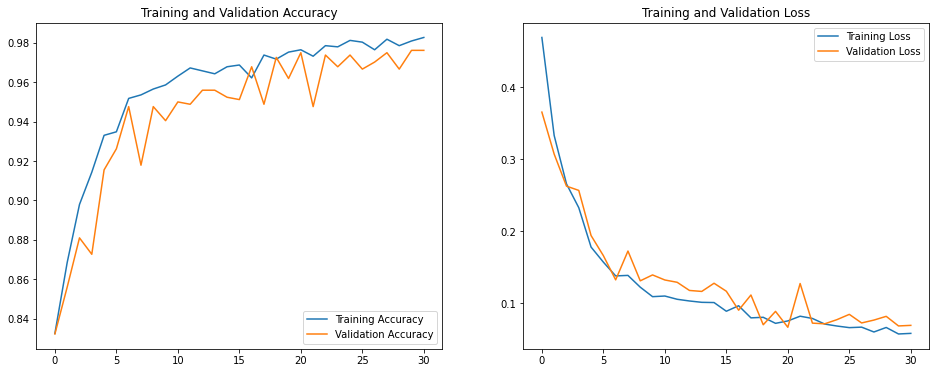

In [38]:
# membuat grafik visualisasi akurasi dan loss

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range2 = range(31)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range2, acc2, label='Training Accuracy')
plt.plot(epochs_range2, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range2, loss2, label='Training Loss')
plt.plot(epochs_range2, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("gambar_acc&loss_model2.jpg")
plt.show()

In [39]:
print("Time to Fit: " + str((t2_2-t1_2)/60) + " Minutes")

Time to Fit: 26.441999848683675 Minutes


In [40]:
prediction2= model2.predict(validation_generator, 
                          #  steps=np.ceil(validation_generator.samples/validation_generator.batch_size),
                           verbose=2)
prediction2= (prediction2 > 0.5)
# result = np.where(prediction > 0.5, 1, 0)
prediction2

27/27 - 11s - 11s/epoch - 407ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff8d6643880>)

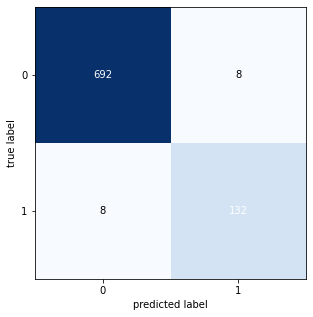

In [41]:
cm2= confusion_matrix(validation_generator.classes, prediction2)
plot_confusion_matrix(cm2, figsize=(5,5))
# plot_confusion_matrix.savefig("gambar_confmatt_model2.jpg")

In [42]:
print(accuracy_score(validation_generator.classes, prediction2))
print(classification_report(validation_generator.classes, prediction2))

0.9809523809523809
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       700
           1       0.94      0.94      0.94       140

    accuracy                           0.98       840
   macro avg       0.97      0.97      0.97       840
weighted avg       0.98      0.98      0.98       840



In [43]:
model2.evaluate(train_generator)

105/105 [==============================] - 38s 366ms/step - loss: 0.0537 - accuracy: 0.9851


[0.053689226508140564, 0.9851190447807312]

In [44]:
model2.evaluate(validation_generator)

27/27 [==============================] - 9s 336ms/step - loss: 0.0698 - accuracy: 0.9774


[0.06983710080385208, 0.9773809313774109]

###**8.3 Model 3**

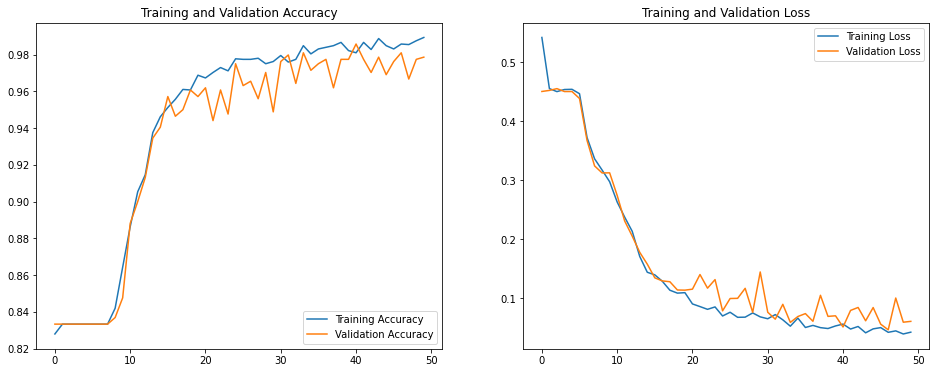

<Figure size 432x288 with 0 Axes>

In [45]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs_range3 = range(50)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range3, acc3, label='Training Accuracy')
plt.plot(epochs_range3, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range3, loss3, label='Training Loss')
plt.plot(epochs_range3, val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig("gambar_acc&loss_model3.jpg")

In [46]:
print("Time to Fit: " + str((t2_3-t1_3)/60) + " Minutes")

Time to Fit: 41.00275385777156 Minutes


In [47]:
prediction3= model3.predict(validation_generator, 
                          #  steps=np.ceil(validation_generator.samples/validation_generator.batch_size),
                           verbose=2)
prediction3= (prediction3 > 0.5)
# result = np.where(prediction > 0.5, 1, 0)
prediction3

27/27 - 9s - 9s/epoch - 344ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff8d646b820>)

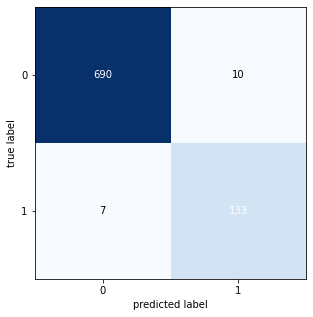

In [48]:
cm3= confusion_matrix(validation_generator.classes, prediction3)
plot_confusion_matrix(cm3, figsize=(5,5))
# plot_confusion_matrix.savefig("gambar_confmatt_model3.jpg")

In [49]:
print(accuracy_score(validation_generator.classes, prediction3))
print(classification_report(validation_generator.classes, prediction3))

0.9797619047619047
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       700
           1       0.93      0.95      0.94       140

    accuracy                           0.98       840
   macro avg       0.96      0.97      0.96       840
weighted avg       0.98      0.98      0.98       840



In [50]:
model3.evaluate(train_generator)

105/105 [==============================] - 38s 362ms/step - loss: 0.0300 - accuracy: 0.9920


[0.029998091980814934, 0.9919642806053162]

In [51]:
model3.evaluate(validation_generator)

27/27 [==============================] - 9s 337ms/step - loss: 0.0475 - accuracy: 0.9845


[0.04747168347239494, 0.9845238327980042]

###**Hasil Perbandingan**

Dari ketiga model diatas, model 2 dengan 6 *hidden layers* mencapai tingkat akurasi hampir 99%, lebih tinggi daripada model 1 dan model 3 memiliki tingkat akurasi 98%. Maka model 2 akan dipilih untuk selanjutnya diimplementasikan pada tahap *deployment*

##**9. Deployment**



###**9.1 Testing Model Model**

Saving Tuberculosis-643.png to Tuberculosis-643.png


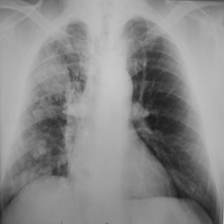

1/1 [==============================] - 0s 192ms/step
Tuberculosis-643.png
(1, 224, 224, 1)
[[0.9988527]]
Tuberkulosis


In [52]:
# memprediksi gambar yang diupload ke dalam notebook

uploaded_files = files.upload()
 
for pic in uploaded_files.keys():
  path = pic
  # img = tf.keras.utils.load_img(path, target_size=(224,224))
  # x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  x = cv2.imread(path)
  x = cv2.resize(x,(224,224))
  x = x.reshape(224, 224, x.shape[2])
  x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) 
  imgplot = cv2_imshow(x)
  x = np.array(x)/255
  x = x.reshape(-1, 224, 224, 1)
  # x = tf.keras.utils.img_to_array(x)
  # x = x.reshape(1,224,224,1)
  # x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model2.predict(images, batch_size=32)
  
  print(pic)
  print(x.shape)
  print(classes)
  if classes<0.5:
   print('Normal')
  elif classes>0.5:
   print('Tuberkulosis')

###**9.2 Saving Model**

In [53]:
model2.save("model2.h5")